# Starting with importing required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Importing Numpy and Pandas for dataframe operations
import numpy as np
import pandas as pd
from pandas import DataFrame

#Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Sklearn for ML operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Importing statmodel for OLS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = MinMaxScaler()

## Importing data into Car Dataframe

In [2]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Deleting Car ID as this is just a unique identification number and won't help in our model.
car.drop(['car_ID'], axis = 1, inplace = True)

### Separating Brand name from CarName column as mentioned in the requirements

In [4]:
car['Brand']=car['CarName'].astype('object').apply(lambda x: x.split(" ",1)[0])
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [5]:
#Deleting the column CarName as it is of no use.
car.drop(['CarName'], axis = 1, inplace = True)

In [6]:
#Viewing unique values in Brand Names
car.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Replacing short forms/incorrect names in Brand names with original names

In [7]:
car.replace(to_replace =["vokswagen", "vw"],  
                            value ="volkswagen",inplace=True) 

In [8]:
car.replace(to_replace =["porcshce"],  
                            value ="porsche",inplace=True)

In [9]:
car.replace(to_replace =["maxda"],  
                            value ="mazda",inplace=True)

In [10]:
car.replace(to_replace =["Nissan"],  
                            value ="nissan",inplace=True)

In [11]:
car.replace(to_replace =["toyouta"],  
                            value ="toyota",inplace=True)

In [12]:
car.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

## Plotting Correlations plot among all the numeric variabes

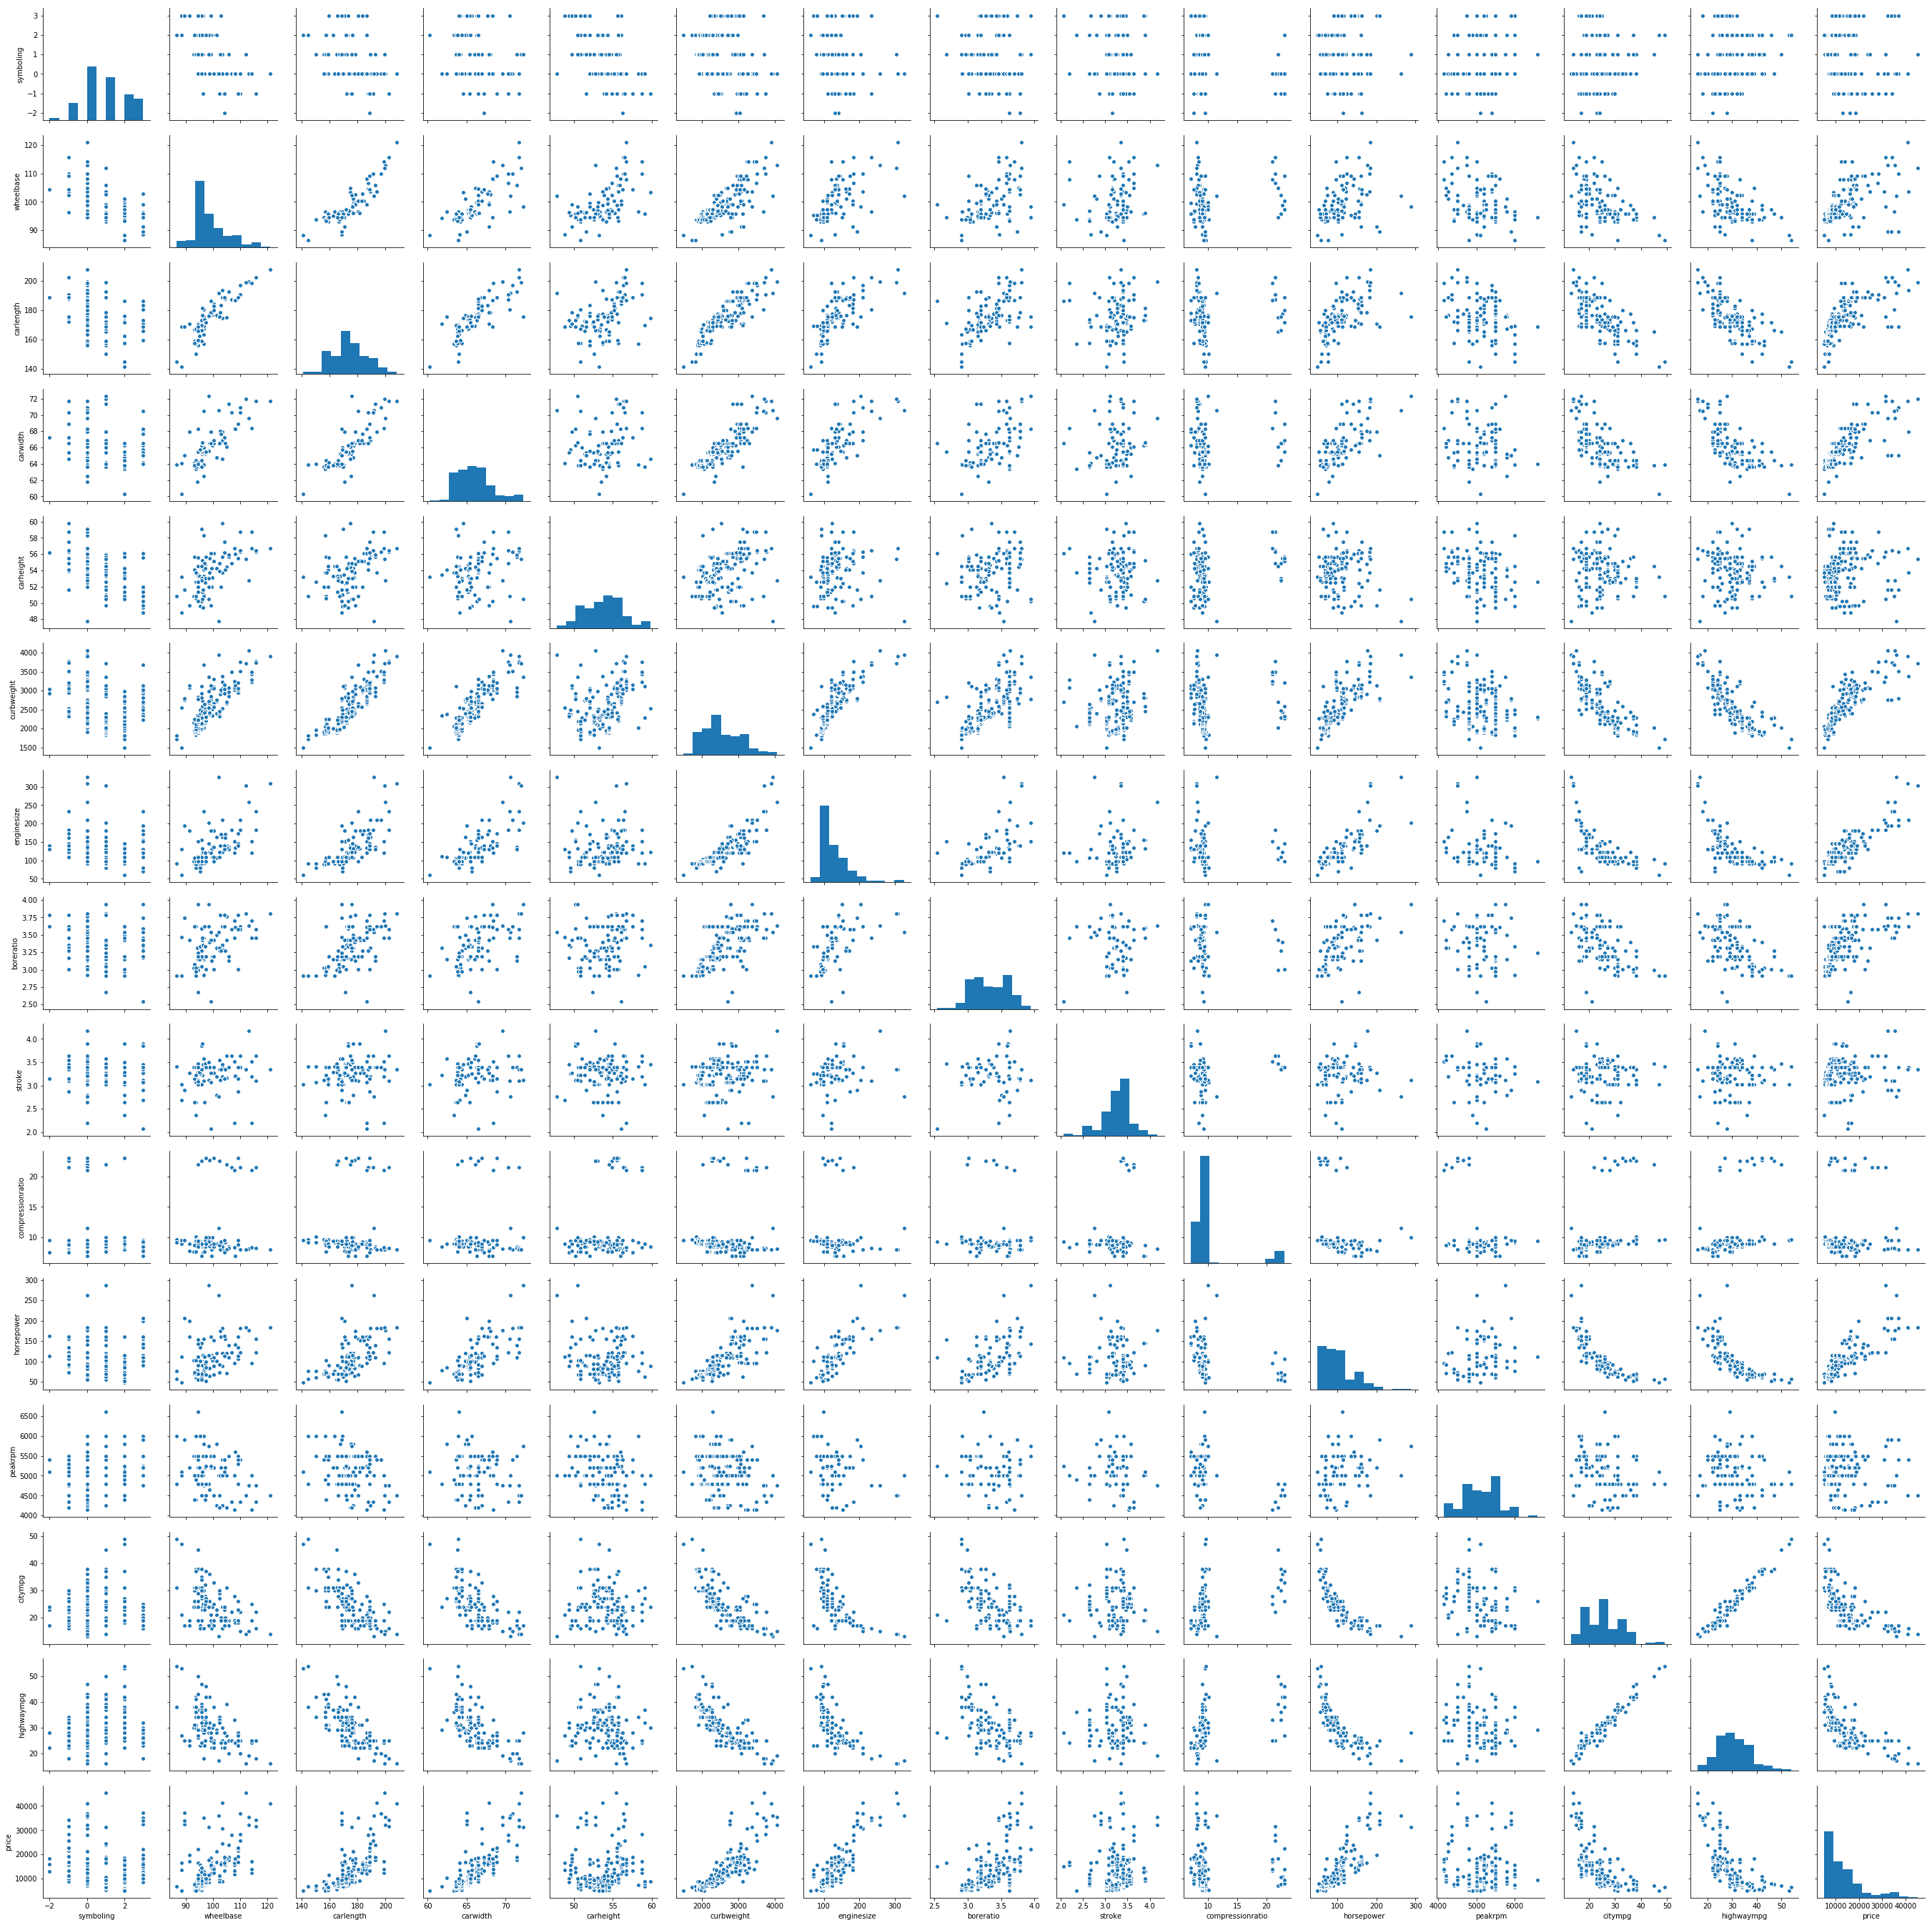

In [15]:
sns.pairplot(car)
plt.show()

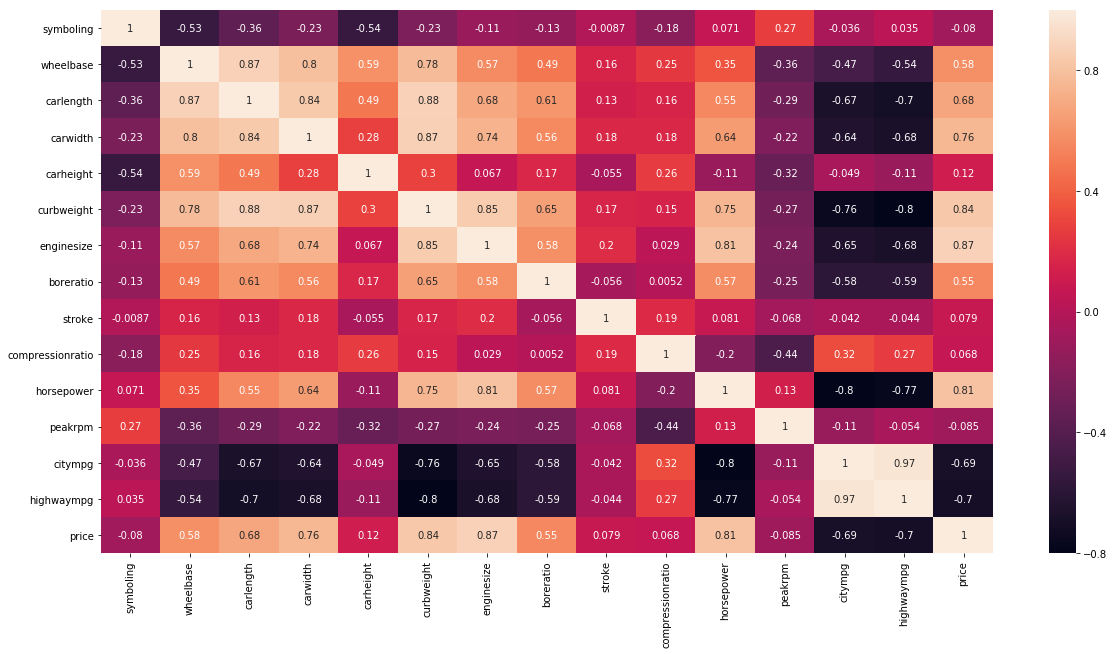

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = car.select_dtypes(include=numerics)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(newdf.corr(),annot = True)

## Plotting correlation of Categorical vriables with price

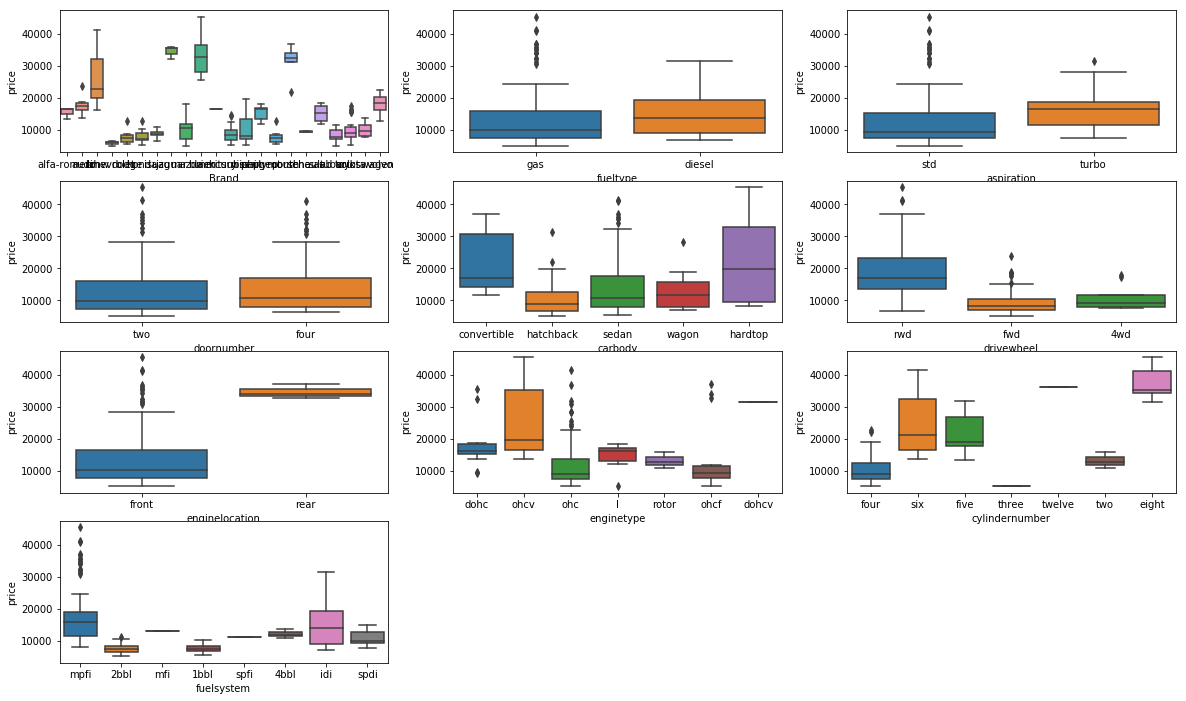

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'Brand', y = 'price', data = car)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

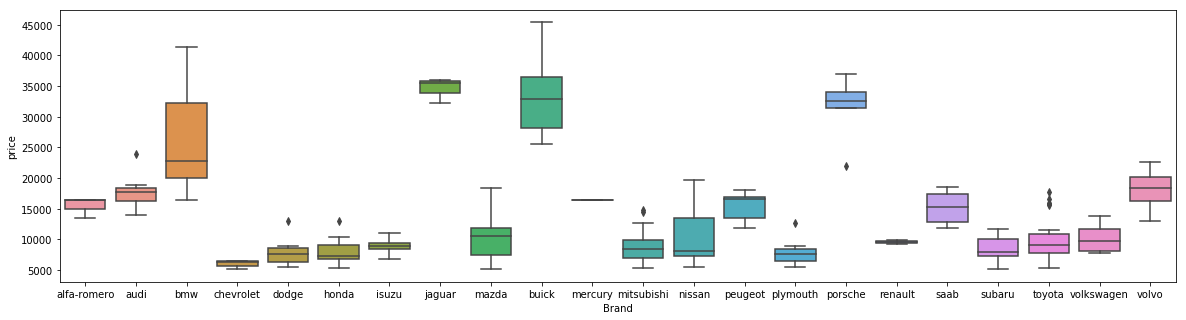

In [18]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'Brand', y = 'price', data = car)
plt.show()

## Segmenting brands based on median price 

#### Based on the distribution of prices in different brands I decided to separate luxury brands from others. All brands median price more than 15000 are segmented as luxury segments.

/Users/rahulpatel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


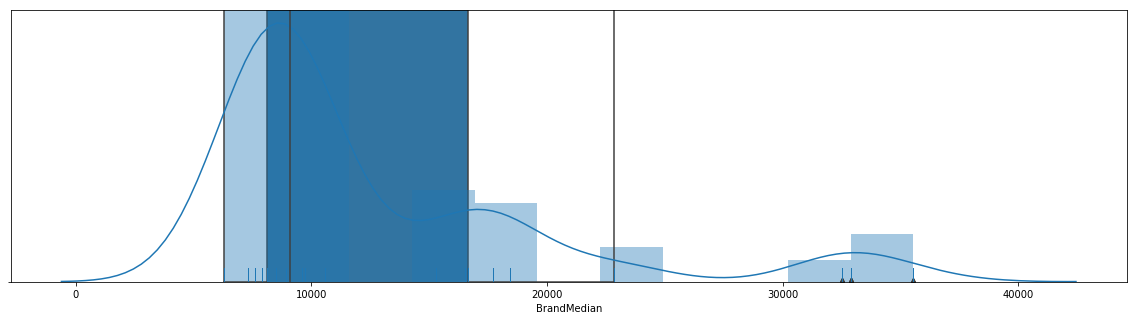

In [19]:
median_price=car.groupby(['Brand'])['price'].median()
median_price = median_price.to_frame().reset_index()
median_price.columns = ['Brand', 'BrandMedian']
median_price.head()
car=car.merge(median_price)
car.head()
plt.figure(figsize = (20, 5))
sns.boxplot(car['BrandMedian'])
sns.distplot(car['BrandMedian'], rug=True)
plt.show()

In [20]:
car.groupby(['Brand'])['BrandMedian'].median()

Brand
alfa-romero    16500.0
audi           17710.0
bmw            22835.0
buick          32892.0
chevrolet       6295.0
dodge           7609.0
honda           7295.0
isuzu           8916.5
jaguar         35550.0
mazda          10595.0
mercury        16503.0
mitsubishi      8499.0
nissan          8124.0
peugeot        16630.0
plymouth        7609.0
porsche        32528.0
renault         9595.0
saab           15275.0
subaru          7894.0
toyota          9103.0
volkswagen      9737.5
volvo          18420.0
Name: BrandMedian, dtype: float64

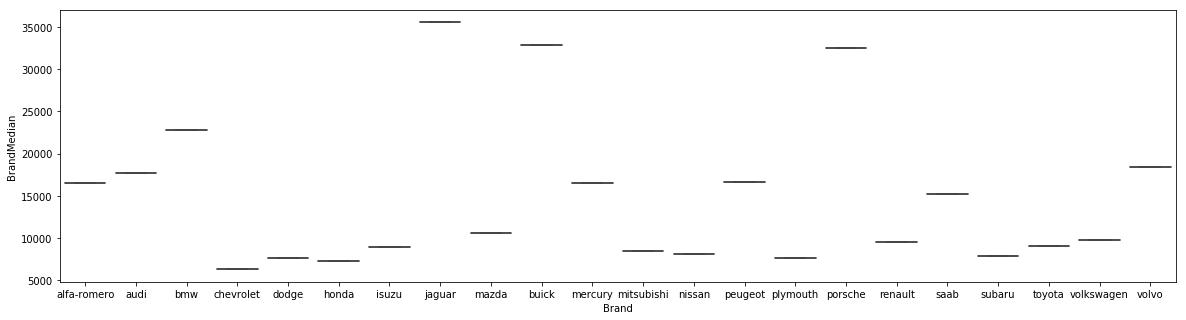

In [21]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'Brand', y = 'BrandMedian', data = car)
plt.show()

#### Creating column for determing luxury segments

In [22]:
car['isLuxury']=car['BrandMedian'].apply(lambda x : 1 if x>15000 else 0)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,BrandMedian,isLuxury
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,16500.0,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,16500.0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,16500.0,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,audi,17710.0,1
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,17710.0,1


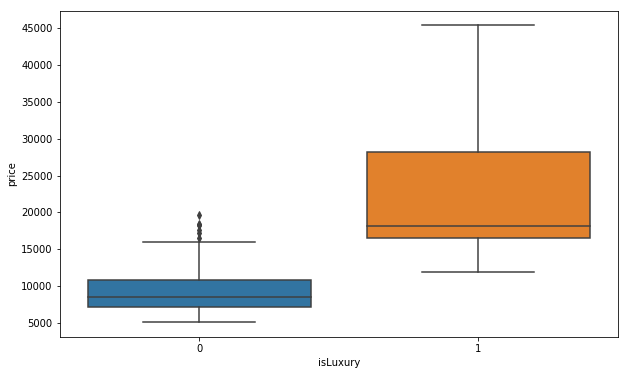

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'isLuxury', y = 'price', data = car)
plt.show()

## Creating dummy variables for important columns related to price

In [24]:
ftype = pd.get_dummies(car['fueltype'],prefix='fuel_', drop_first = True)
asp = pd.get_dummies(car['aspiration'],prefix='aspiration_', drop_first = True)
dnumber = pd.get_dummies(car['doornumber'],prefix='doors__', drop_first = True)
cbody = pd.get_dummies(car['carbody'], drop_first = True)
dwheel = pd.get_dummies(car['drivewheel'],prefix='drive_', drop_first = True)
elocation = pd.get_dummies(car['enginelocation'],prefix='engLoc_', drop_first = True)
etype = pd.get_dummies(car['enginetype'],prefix='engType_', drop_first = True)
cnumber = pd.get_dummies(car['cylindernumber'],prefix='cylNum_', drop_first = True)
fsystem = pd.get_dummies(car['fuelsystem'],prefix='fuelsys_', drop_first = True)
car = pd.concat([car, ftype,asp,dnumber,cbody,dwheel,elocation,etype,cnumber,fsystem], axis = 1)

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 56 columns):
symboling            205 non-null int64
fueltype             205 non-null object
aspiration           205 non-null object
doornumber           205 non-null object
carbody              205 non-null object
drivewheel           205 non-null object
enginelocation       205 non-null object
wheelbase            205 non-null float64
carlength            205 non-null float64
carwidth             205 non-null float64
carheight            205 non-null float64
curbweight           205 non-null int64
enginetype           205 non-null object
cylindernumber       205 non-null object
enginesize           205 non-null int64
fuelsystem           205 non-null object
boreratio            205 non-null float64
stroke               205 non-null float64
compressionratio     205 non-null float64
horsepower           205 non-null int64
peakrpm              205 non-null int64
citympg              205 non-nul

##### Dropping original columns for which dummies were created

In [26]:
car = car.drop(['fueltype'
                ,'aspiration','doornumber','carbody','drivewheel'
                ,'enginelocation','enginetype','cylindernumber','fuelsystem','Brand'],axis=1)

In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 46 columns):
symboling            205 non-null int64
wheelbase            205 non-null float64
carlength            205 non-null float64
carwidth             205 non-null float64
carheight            205 non-null float64
curbweight           205 non-null int64
enginesize           205 non-null int64
boreratio            205 non-null float64
stroke               205 non-null float64
compressionratio     205 non-null float64
horsepower           205 non-null int64
peakrpm              205 non-null int64
citympg              205 non-null int64
highwaympg           205 non-null int64
price                205 non-null float64
BrandMedian          205 non-null float64
isLuxury             205 non-null int64
fuel__gas            205 non-null uint8
aspiration__turbo    205 non-null uint8
doors___two          205 non-null uint8
hardtop              205 non-null uint8
hatchback            205 non-null uin

## Splitting the data set into training and testing sets

In [28]:
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
y_train = df_train.pop('price')
X_train = df_train

#### Building the first model with top independednt variables based on correlation with price

In [30]:
 cols=['carlength','enginesize','isLuxury']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm = sm.OLS(y_train,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     241.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.41e-55
Time:                        22:02:19   Log-Likelihood:                -1353.5
No. Observations:                 143   AIC:                             2715.
Df Residuals:                     139   BIC:                             2727.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7265.3330   5100.451     -1.424      0.157   -1.73e+04    2819.164
carlength     19.9606     32.937      0.606      0.545     -45.162      85.084
enginesize   120.7724      9.399     12.849      0.000     102.188     139.357
isLuxury    6021.9606    807.077      7.461      0.000    4426.226    7617.696
==============================================================================
Omnibus:                       41.119   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.401
Skew:                           1.201   Prob(JB):                     5.23e-21
Kurtosis:                       6.147   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Replacing carlength with carwidth as length was less significant according to the model

In [31]:
 cols=['carwidth','enginesize','isLuxury']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     262.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.62e-57
Time:                        22:02:25   Log-Likelihood:                -1348.4
No. Observations:                 143   AIC:                             2705.
Df Residuals:                     139   BIC:                             2717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.333e+04    1.2e+04     -3.603      0.000   -6.71e+04   -1.95e+04
carwidth     634.3123    194.554      3.260      0.001     249.644    1018.980
enginesize   104.8558      9.717     10.791      0.000      85.644     124.067
isLuxury    5177.7533    772.408      6.703      0.000    3650.564    6704.942
==============================================================================
Omnibus:                       49.420   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.507
Skew:                           1.285   Prob(JB):                     2.31e-35
Kurtosis:                       7.490   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,17.85
0,carwidth,14.28
2,isLuxury,2.15


In [25]:
vif = pd.DataFrame()
X = X.drop(['carwidth'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.82
1,isLuxury,1.82


#### Deleting carwidth from the model due to high VIF

In [32]:
 cols=['enginesize','isLuxury']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y_train,X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     363.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.57e-56
Time:                        22:03:29   Log-Likelihood:                -1353.7
No. Observations:                 143   AIC:                             2713.
Df Residuals:                     140   BIC:                             2722.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4227.2022    936.842     -4.512      0.000   -6079.390   -2375.015
enginesize   123.6595      8.084     15.296      0.000     107.676     139.643
isLuxury    6235.1510    724.730      8.603      0.000    4802.321    7667.981
==============================================================================
Omnibus:                       42.077   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.380
Skew:                           1.226   Prob(JB):                     1.18e-21
Kurtosis:                       6.187   Cond. No.                         507.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding curbweight to the model

In [33]:
 cols=['enginesize','isLuxury','curbweight']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y_train,X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     256.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.02e-56
Time:                        22:03:56   Log-Likelihood:                -1349.9
No. Observations:                 143   AIC:                             2708.
Df Residuals:                     139   BIC:                             2720.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8086.1500   1681.563     -4.809      0.000   -1.14e+04   -4761.401
enginesize    96.7196     12.625      7.661      0.000      71.758     121.681
isLuxury    5157.0936    810.674      6.361      0.000    3554.247    6759.940
curbweight     2.9698      1.085      2.736      0.007       0.824       5.116
==============================================================================
Omnibus:                       42.952   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.046
Skew:                           1.159   Prob(JB):                     8.56e-27
Kurtosis:                       6.844   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,36.73
2,curbweight,35.34
1,isLuxury,1.83


#### Removing curbweight as it seems to increase multicollinearity in the model and adding citympg to see if mileage in the city affects the car price

In [34]:
 cols=['enginesize','isLuxury','citympg']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y_train,X).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     257.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.60e-56
Time:                        22:04:48   Log-Likelihood:                -1349.7
No. Observations:                 143   AIC:                             2707.
Df Residuals:                     139   BIC:                             2719.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1021.8569   2071.534      0.493      0.623   -3073.933    5117.647
enginesize   112.3916      8.842     12.712      0.000      94.910     129.873
isLuxury    5694.7554    732.756      7.772      0.000    4245.966    7143.544
citympg     -145.0217     51.356     -2.824      0.005    -246.561     -43.482
==============================================================================
Omnibus:                       36.004   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.129
Skew:                           1.085   Prob(JB):                     4.85e-17
Kurtosis:                       5.811   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,8.09
2,citympg,5.33
1,isLuxury,2.37


#### Adding fuel__gas columns which tells us whether fuel is Gas or Diesel

In [35]:
 cols=['enginesize','isLuxury','citympg','fuel__gas']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y_train,X).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.45e-56
Time:                        22:05:02   Log-Likelihood:                -1347.8
No. Observations:                 143   AIC:                             2706.
Df Residuals:                     138   BIC:                             2720.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4654.2920   2781.691      1.673      0.097    -845.955    1.02e+04
enginesize   108.4119      8.995     12.053      0.000      90.627     126.197
isLuxury    5251.8643    760.938      6.902      0.000    3747.258    6756.471
citympg     -193.1460     56.621     -3.411      0.001    -305.103     -81.189
fuel__gas  -1961.4060   1014.434     -1.933      0.055   -3967.249      44.437
==============================================================================
Omnibus:                       35.927   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.020
Skew:                           1.025   Prob(JB):                     3.45e-19
Kurtosis:                       6.173   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Fuel seems insignificant(according to p value) to the price so removing it and adding aspiration to the model

In [36]:
 cols=['enginesize','isLuxury','citympg','aspiration__turbo']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y_train,X).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.88e-55
Time:                        22:05:36   Log-Likelihood:                -1349.3
No. Observations:                 143   AIC:                             2709.
Df Residuals:                     138   BIC:                             2723.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               707.9109   2102.482      0.337      0.737   -3449.335    4865.156
enginesize          113.1663      8.890     12.729      0.000      95.587     130.745
isLuxury           5563.4853    747.804      7.440      0.000    4084.850    7042.121
citympg            -139.4205     51.772     -2.693      0.008    -241.790     -37.051
aspiration__turbo   624.1550    697.340      0.895      0.372    -754.697    2003.007
==============================================================================
Omnibus:                       38.642   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.856
Skew:                           1.136   Prob(JB):                     2.27e-19
Kurtosis:                       6.041   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Adding drive type to the model as the correlation graphs suggest it should affect the price. Drive__fwd tells us if the vehicle is frot wheel drive or not. Also removing aspiration from the model

In [37]:
 cols=['enginesize','isLuxury','citympg','drive__fwd']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y_train,X).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     200.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.97e-56
Time:                        22:05:55   Log-Likelihood:                -1346.9
No. Observations:                 143   AIC:                             2704.
Df Residuals:                     138   BIC:                             2719.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1515.4032   2050.269      0.739      0.461   -2538.602    5569.408
enginesize   110.1091      8.759     12.571      0.000      92.790     127.428
isLuxury    5071.3826    769.368      6.592      0.000    3550.109    6592.656
citympg     -107.9761     52.998     -2.037      0.044    -212.769      -3.184
drive__fwd -1624.9546    697.391     -2.330      0.021   -3003.908    -246.001
==============================================================================
Omnibus:                       34.559   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.491
Skew:                           1.007   Prob(JB):                     1.49e-17
Kurtosis:                       5.991   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,citympg,9.83
0,enginesize,8.11
3,drive__fwd,4.44
1,isLuxury,2.68


#### Removing city mileage as it becomes insignificant after adding drive type

In [39]:
 cols=['enginesize','isLuxury','drive__fwd']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_7 = sm.OLS(y_train,X).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     259.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.61e-57
Time:                        22:06:25   Log-Likelihood:                -1349.0
No. Observations:                 143   AIC:                             2706.
Df Residuals:                     139   BIC:                             2718.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1911.6002   1185.494     -1.612      0.109   -4255.533     432.333
enginesize   117.1448      8.140     14.391      0.000     101.050     133.240
isLuxury    5274.0052    771.511      6.836      0.000    3748.590    6799.420
drive__fwd -2051.2019    672.768     -3.049      0.003   -3381.383    -721.021
==============================================================================
Omnibus:                       35.864   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.658
Skew:                           1.029   Prob(JB):                     6.82e-19
Kurtosis:                       6.131   Cond. No.                         654.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.34
1,isLuxury,2.65
2,drive__fwd,2.41


#### Adding engLoc_rear to the model which will tell us if the price will change if the engine is placed in the rear part of the car.

In [41]:
 cols=['enginesize','isLuxury','drive__fwd','engLoc__rear']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y_train,X).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.54e-57
Time:                        22:06:45   Log-Likelihood:                -1345.4
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     138   BIC:                             2716.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1749.3141   1161.446     -1.506      0.134   -4045.845     547.217
enginesize     115.5337      7.987     14.465      0.000      99.741     131.326
isLuxury      5176.7992    755.704      6.850      0.000    3682.543    6671.056
drive__fwd   -2033.8241    658.259     -3.090      0.002   -3335.402    -732.246
engLoc__rear  8186.9727   3049.196      2.685      0.008    2157.787    1.42e+04
==============================================================================
Omnibus:                       41.001   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.483
Skew:                           1.118   Prob(JB):                     1.02e-24
Kurtosis:                       6.680   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.36
1,isLuxury,2.66
2,drive__fwd,2.42
3,engLoc__rear,1.03


#### Adding engine type to the model.

In [43]:
 cols=['enginesize','isLuxury','drive__fwd','engLoc__rear','engType__ohc']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y_train,X).fit()
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.49e-56
Time:                        22:06:57   Log-Likelihood:                -1343.8
No. Observations:                 143   AIC:                             2700.
Df Residuals:                     137   BIC:                             2717.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2429.5507   1215.130     -1.999      0.048   -4832.388     -26.714
enginesize     117.8103      8.030     14.671      0.000     101.931     133.689
isLuxury      4968.9851    759.107      6.546      0.000    3467.903    6470.067
drive__fwd   -2546.6903    714.765     -3.563      0.001   -3960.089   -1133.292
engLoc__rear  8633.3596   3036.498      2.843      0.005    2628.894    1.46e+04
engType__ohc  1106.8204    626.062      1.768      0.079    -131.173    2344.814
==============================================================================
Omnibus:                       38.858   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.440
Skew:                           1.105   Prob(JB):                     5.13e-21
Kurtosis:                       6.286   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.61
2,drive__fwd,4.00
4,engType__ohc,3.89
1,isLuxury,2.71
3,engLoc__rear,1.04


#### Checking if number of cylinders plays a significant role in the price determination. cylNum__four says if the vehicle as 4 cylinders.

In [45]:
 cols=['enginesize','isLuxury','drive__fwd','engLoc__rear','engType__ohc','cylNum__four']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_10 = sm.OLS(y_train,X).fit()
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     176.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.15e-61
Time:                        22:07:36   Log-Likelihood:                -1328.6
No. Observations:                 143   AIC:                             2671.
Df Residuals:                     136   BIC:                             2692.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2242.3714   1371.425      1.635      0.104    -469.704    4954.447
enginesize      98.2869      8.023     12.251      0.000      82.421     114.153
isLuxury      4953.6140    685.121      7.230      0.000    3598.745    6308.483
drive__fwd   -1920.2222    654.477     -2.934      0.004   -3214.491    -625.953
engLoc__rear  7764.3470   2744.803      2.829      0.005    2336.332    1.32e+04
engType__ohc  1473.5018    568.723      2.591      0.011     348.818    2598.186
cylNum__four -3838.5972    676.575     -5.674      0.000   -5176.566   -2500.628
==============================================================================
Omnibus:                       30.366   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.637
Skew:                           0.904   Prob(JB):                     9.21e-15
Kurtosis:                       5.754   Cond. No.                     1.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
vif = pd.DataFrame()
X = X.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.95
2,drive__fwd,4.76
5,cylNum__four,4.29
4,engType__ohc,4.23
1,isLuxury,2.72
3,engLoc__rear,1.04


#### Checking if the fuel system influence the car price. Adding fuelsys__mpfi 

In [47]:
 cols=['enginesize','isLuxury','drive__fwd','engLoc__rear','engType__ohc','cylNum__four','fuelsys__mpfi']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_11 = sm.OLS(y_train,X).fit()
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.60e-60
Time:                        22:07:43   Log-Likelihood:                -1328.6
No. Observations:                 143   AIC:                             2673.
Df Residuals:                     135   BIC:                             2697.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2245.7617   1380.060      1.627      0.106    -483.571    4975.095
enginesize       98.3439      8.223     11.960      0.000      82.082     114.606
isLuxury       4958.6472    703.248      7.051      0.000    3567.839    6349.455
drive__fwd    -1920.9579    657.247     -2.923      0.004   -3220.790    -621.126
engLoc__rear   7763.8979   2754.970      2.818      0.006    2315.415    1.32e+04
engType__ohc   1471.0682    575.248      2.557      0.012     333.404    2608.732
cylNum__four  -3840.6136    681.632     -5.634      0.000   -5188.673   -2492.554
fuelsys__mpfi   -19.0154    556.460     -0.034      0.973   -1119.522    1081.491
==============================================================================
Omnibus:                       30.416   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.706
Skew:                           0.905   Prob(JB):                     8.90e-15
Kurtosis:                       5.753   Cond. No.                     1.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Removing fuelsys__mpfi as it seems to be insignificant

In [48]:
 cols=['enginesize','isLuxury','drive__fwd','engLoc__rear','engType__ohc','cylNum__four']
X= X_train[cols]
X = sm.add_constant(X)
# create a fitted model in one line
lm_12 = sm.OLS(y_train,X).fit()
lm_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     176.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.15e-61
Time:                        22:07:47   Log-Likelihood:                -1328.6
No. Observations:                 143   AIC:                             2671.
Df Residuals:                     136   BIC:                             2692.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2242.3714   1371.425      1.635      0.104    -469.704    4954.447
enginesize      98.2869      8.023     12.251      0.000      82.421     114.153
isLuxury      4953.6140    685.121      7.230      0.000    3598.745    6308.483
drive__fwd   -1920.2222    654.477     -2.934      0.004   -3214.491    -625.953
engLoc__rear  7764.3470   2744.803      2.829      0.005    2336.332    1.32e+04
engType__ohc  1473.5018    568.723      2.591      0.011     348.818    2598.186
cylNum__four -3838.5972    676.575     -5.674      0.000   -5176.566   -2500.628
==============================================================================
Omnibus:                       30.366   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.637
Skew:                           0.904   Prob(JB):                     9.21e-15
Kurtosis:                       5.754   Cond. No.                     1.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The above model gives good R squared and Adjusted R squared values as well as F statistics value but warnings tell us about multicollinearity.

### Checking multicollinearity

In [49]:
vif = pd.DataFrame()
Y = X.drop(['const'],axis=1)
vif['Features'] = Y.columns
vif['VIF'] = [variance_inflation_factor(Y.values, i) for i in range(Y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.95
2,drive__fwd,4.76
5,cylNum__four,4.29
4,engType__ohc,4.23
1,isLuxury,2.72
3,engLoc__rear,1.04


#### The VIF for Carwidth seems to be on the higher side, but the p value suggest strong significance . Hence going forward with the last model to predict the price.

## Interpreting the coefficients of the model
#### EngineSize : A unit change here increses the price by 98 units
#### <font color=blue>isLuxury : This suggest that Luxury cars are costlier by 4953 units from normal ones if we keep all other features constant </font>
#### drive__fwd : It is clear that forward wheel drive vehicles are cheaper by 1920 units
#### engLoc__rear : Vehicles with rear engines seems to really costlier
#### engType__ohc : ohc type engines affects the price by 1473 units upwards
#### cylNum__four: 4 cylinder engines seems to cheaper by 3838 units

In [50]:
y_train_price=lm_12.predict(X)

### Plotting Error Terms

/Users/rahulpatel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

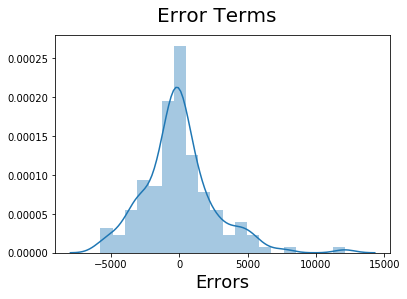

In [51]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Predicting price for the test data set

In [52]:
y_test = df_test.pop('price')
X_test = df_test
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]


In [53]:
y_pred = lm_12.predict(X_test_new)

Text(0,0.5,'Views')

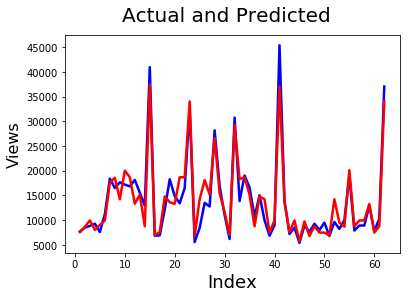

In [54]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

# <font color=blue> Computing R-squared score on the test data </font>

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_pred)

0.9108428110123392